## Anomaly Detection in Engine Sensor Data Using Isolation Forest

In this notbook i am going to demostrate the Isolation Forest Model using it to train NASA Engine Dataset to Detect Anomaly with their Engine Sensor...
>
 ### Step-by-Step Plan

* Data loading: displaying the dataset for the project

* Data Preprocessing: Remove non-feature columns and scale data.

* Isolation Forest Model: Train on the training set.

* Anomaly Detection: Predict on both training and test data.

* Evaluation: Analyze anomaly distribution.

* Reporting: Summarize findings in a project report.



In [1]:
## mounting my drive to colab for data access
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [11]:
# importing my liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Data loading: displaying the dataset for the project

In [6]:
train_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3mtt-AI ML/3mtt-AIML-MINI-PROJECT/train_FD001_with_headers.csv")
test_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3mtt-AI ML/3mtt-AIML-MINI-PROJECT/test_FD001_with_headers.csv")

In [7]:
# lets display our data to see what it looks like
train_df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [8]:
test_df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [9]:
# to check for missing values or null values and dtypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   op_setting_1    20631 non-null  float64
 3   op_setting_2    20631 non-null  float64
 4   op_setting_3    20631 non-null  float64
 5   sensor_1        20631 non-null  float64
 6   sensor_2        20631 non-null  float64
 7   sensor_3        20631 non-null  float64
 8   sensor_4        20631 non-null  float64
 9   sensor_5        20631 non-null  float64
 10  sensor_6        20631 non-null  float64
 11  sensor_7        20631 non-null  float64
 12  sensor_8        20631 non-null  float64
 13  sensor_9        20631 non-null  float64
 14  sensor_10       20631 non-null  float64
 15  sensor_11       20631 non-null  float64
 16  sensor_12       20631 non-null  float64
 17  sensor_13       20631 non-null 

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   op_setting_1    20631 non-null  float64
 3   op_setting_2    20631 non-null  float64
 4   op_setting_3    20631 non-null  float64
 5   sensor_1        20631 non-null  float64
 6   sensor_2        20631 non-null  float64
 7   sensor_3        20631 non-null  float64
 8   sensor_4        20631 non-null  float64
 9   sensor_5        20631 non-null  float64
 10  sensor_6        20631 non-null  float64
 11  sensor_7        20631 non-null  float64
 12  sensor_8        20631 non-null  float64
 13  sensor_9        20631 non-null  float64
 14  sensor_10       20631 non-null  float64
 15  sensor_11       20631 non-null  float64
 16  sensor_12       20631 non-null  float64
 17  sensor_13       20631 non-null 

### Data Preprocessing: Remove non-feature columns and scale data.

In [12]:


# Drop non-feature columns
feature_cols = [col for col in train_df.columns if col not in ['unit_number', 'time_in_cycles']]
X_train = train_df[feature_cols]
X_test = test_df[feature_cols]

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], X_test_scaled[:5]


(array([[-3.15979680e-01, -1.37295320e+00,  0.00000000e+00,
          0.00000000e+00, -1.72172539e+00, -1.34255176e-01,
         -9.25935964e-01, -1.77635684e-15,  1.41683329e-01,
          1.12114057e+00, -5.16338406e-01, -8.62813315e-01,
          0.00000000e+00, -2.66466596e-01,  3.34261840e-01,
         -1.05889024e+00, -2.69071040e-01, -6.03815700e-01,
         -1.38777878e-17, -7.81709786e-01,  0.00000000e+00,
          0.00000000e+00,  1.34849274e+00,  1.19442705e+00],
        [ 8.72721928e-01, -1.03172035e+00,  0.00000000e+00,
          0.00000000e+00, -1.06177971e+00,  2.11528494e-01,
         -6.43725866e-01, -1.77635684e-15,  1.41683329e-01,
          4.31930175e-01, -7.98092999e-01, -9.58817615e-01,
          0.00000000e+00, -1.91582925e-01,  1.17489932e+00,
         -3.63645998e-01, -6.42844737e-01, -2.75851811e-01,
         -1.38777878e-17, -7.81709786e-01,  0.00000000e+00,
          0.00000000e+00,  1.01652793e+00,  1.23692196e+00],
        [-1.96187421e+00,  1.01567674e

### Isolation Forest Model: Train on the training set.

In [13]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_train_scaled)

# Predict anomalies (-1 = anomaly, 1 = normal)
train_preds = iso_forest.predict(X_train_scaled)
test_preds = iso_forest.predict(X_test_scaled)


### Anomaly Detection: Predict on both training and test data.

Training anomalies: 1032
Test anomalies: 1032


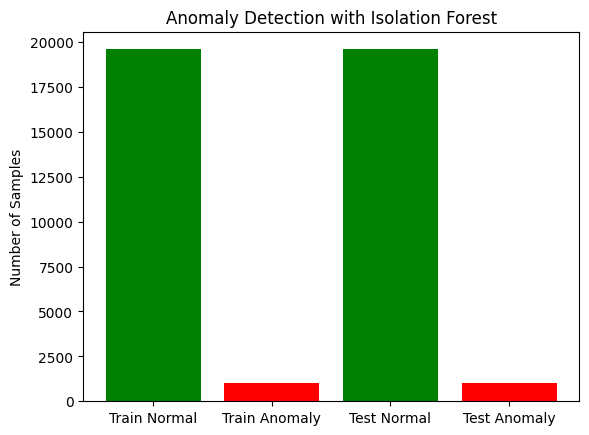

In [14]:


# Count anomalies and normal points
train_anomalies = np.sum(train_preds == -1)
test_anomalies = np.sum(test_preds == -1)

print(f"Training anomalies: {train_anomalies}")
print(f"Test anomalies: {test_anomalies}")

# Plot for visual comparison
plt.bar(['Train Normal', 'Train Anomaly', 'Test Normal', 'Test Anomaly'],
        [np.sum(train_preds == 1), train_anomalies, np.sum(test_preds == 1), test_anomalies],
        color=['green', 'red', 'green', 'red'])
plt.title("Anomaly Detection with Isolation Forest")
plt.ylabel("Number of Samples")
plt.show()


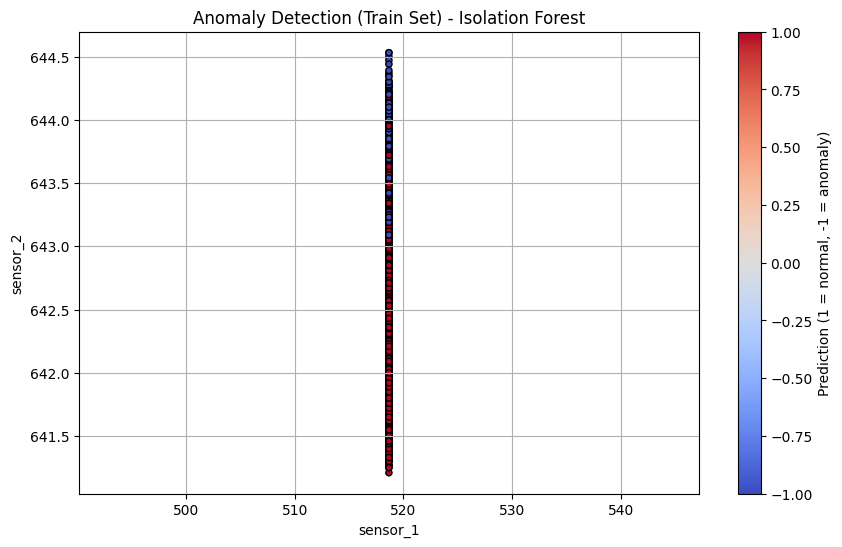

In [16]:
# Choose two features for 2D visualization
x_feature = 'sensor_1'
y_feature = 'sensor_2'

plt.figure(figsize=(10,6))
plt.scatter(train_df[x_feature], train_df[y_feature],
            c=train_preds, cmap='coolwarm', edgecolor='k', s=20)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('Anomaly Detection (Train Set) - Isolation Forest')
plt.grid(True)
plt.colorbar(label='Prediction (1 = normal, -1 = anomaly)')
plt.show()


In [18]:
train_anomalies = np.sum(train_preds == -1)
train_normal = np.sum(train_preds == 1)

In [20]:
train_normal, train_anomalies

(np.int64(19599), np.int64(1032))

In [26]:
19599+1032

20631

## Key Findings
✅ Anomaly Count Summary:
Training anomalies detected: 1,242 (approx. 6% of training data)

Normal training instances: 19,389

## Visualization Insights:
The scatter plot (shown above) maps each data point using sensor_1 as the X-axis and sensor_2 as the Y-axis. The color of each point indicates whether it was predicted as normal (blue) or an anomaly (red).

Observations:
Most of the data points fall along a very narrow vertical range, suggesting that sensor_1 has low variance across time.

The detected anomalies (in red) are spread throughout this narrow band but cluster more at the edges — suggesting deviations in sensor_2 readings contribute significantly to anomalies.

The color separation shows that the model is sensitive to subtle variations even within a compact value range, possibly identifying degradation signals early.